# ML Zoomcamp 2023 - Homework #6 

### In this homework, we will train tree-based models for regression

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('housing.csv')

# Filter the records
df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [12]:
df.T

,701,830,859,860,861,862,863,870,880,881,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-121.97,-121.99,-121.97,-121.96,-121.98,-121.99,-122.0,-121.93,-121.99,-121.99,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.64,37.61,37.57,37.58,37.58,37.58,37.58,37.49,37.56,37.56,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,32.0,9.0,21.0,15.0,20.0,31.0,6.0,5.0,18.0,20.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,1283.0,3666.0,4342.0,3575.0,4126.0,2878.0,4405.0,1150.0,5505.0,6462.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,194.0,711.0,783.0,597.0,1031.0,478.0,717.0,311.0,1005.0,1294.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,485.0,2341.0,2172.0,1777.0,2079.0,1276.0,2071.0,648.0,2641.0,3288.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,171.0,703.0,789.0,559.0,975.0,485.0,688.0,245.0,971.0,1235.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,6.0574,4.6458,4.6146,5.7192,3.6832,6.2073,5.8151,3.5714,5.0,4.3393,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,431000.0,217000.0,247600.0,283500.0,216900.0,282500.0,295600.0,300000.0,269700.0,231200.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,...,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


# Preparing the dataset

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Preparation:

    Fill missing values with zeros.
    Apply the log tranform to median_house_value.
    Do train/validation/test split with 60%/20%/20% distribution.
    Use the train_test_split function and set the random_state parameter to 1.
    Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [13]:
df = df.fillna(0)


In [14]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
import numpy as np

df['median_house_value'] = np.log(df['median_house_value'])

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into train (60%), validation (20%), and test (20%) sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

In [19]:
del df_train['median_house_value']
del df_val['median_house_value']
del  df_test['median_house_value']

In [23]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [24]:

train_dict = df_train.to_dict(orient='records')
train_val = df_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(train_val)

## Question 1

Let's train a decision tree regressor to predict the median_house_value variable.

    Train a model with max_depth=1.

Which feature is used for splitting the data?

In [25]:
from sklearn.tree import DecisionTreeRegressor, export_text

# Create the decision tree regressor with max_depth=1
model = DecisionTreeRegressor(max_depth=1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the feature importance
feature_importance = model.feature_importances_

# Identify the feature with the highest importance
splitting_feature_index = feature_importance.argmax()
splitting_feature = dv.get_feature_names_out()[splitting_feature_index]

# Print the splitting feature
print("The feature used for splitting the data is:", splitting_feature)

The feature used for splitting the data is: ocean_proximity=INLAND


In [26]:
print(export_text(model, feature_names=dv.feature_names_))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.30]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



## Question 2

Train a random forest model with these parameters:

    n_estimators=10
    random_state=1
    n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create the random forest model
rf_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = rf_model.predict(X_val)

# Calculate RMSE
rmse = mean_squared_error(y_val, y_val_pred, squared=False)

# Print the RMSE
print("RMSE on validation:", rmse)

RMSE on validation: 0.24539095817174172


## Question 3

Now let's experiment with the n_estimators parameter

    Try different values of this parameter from 10 to 200 with step 10.
    Set random_state to 1.
    Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving?

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rmse_values = []

# Define a range of n_estimators values to try
n_estimators_values = list(range(10, 201, 10))

# Initialize variables to keep track of the best RMSE and the corresponding n_estimators
best_rmse = float('inf')
best_n_estimators = None

for n_estimators in n_estimators_values:
    # Create and train the random forest model
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation data
    y_val_pred = rf_model.predict(X_val)

    # Calculate RMSE
    rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    rmse_values.append(rmse)

    # Check if this model's RMSE is better than the best RMSE so far
    if rmse < best_rmse:
        best_rmse = rmse
        best_n_estimators = n_estimators

    # Print the RMSE for the current n_estimators
    print(f"n_estimators = {n_estimators}, RMSE = {rmse}")

# Print the n_estimators after which RMSE stops improving
print(f"After n_estimators = {best_n_estimators}, RMSE stops improving.")

n_estimators = 10, RMSE = 0.2453909581717417
n_estimators = 20, RMSE = 0.23880223304120451
n_estimators = 30, RMSE = 0.2365722829295434
n_estimators = 40, RMSE = 0.2348246132763343
n_estimators = 50, RMSE = 0.23493852291123088
n_estimators = 60, RMSE = 0.2348497583721606
n_estimators = 70, RMSE = 0.23460280075691634
n_estimators = 80, RMSE = 0.2347055246179976
n_estimators = 90, RMSE = 0.23446978540671826
n_estimators = 100, RMSE = 0.23429995927063066
n_estimators = 110, RMSE = 0.2343108668015635
n_estimators = 120, RMSE = 0.23403792713007843
n_estimators = 130, RMSE = 0.2338571152765766
n_estimators = 140, RMSE = 0.23367933590798592
n_estimators = 150, RMSE = 0.2335695736017086
n_estimators = 160, RMSE = 0.23342910921519966
n_estimators = 170, RMSE = 0.2333338300297293
n_estimators = 180, RMSE = 0.23354884630993802
n_estimators = 190, RMSE = 0.23382427295542146
n_estimators = 200, RMSE = 0.23372630792663035
After n_estimators = 170, RMSE stops improving.


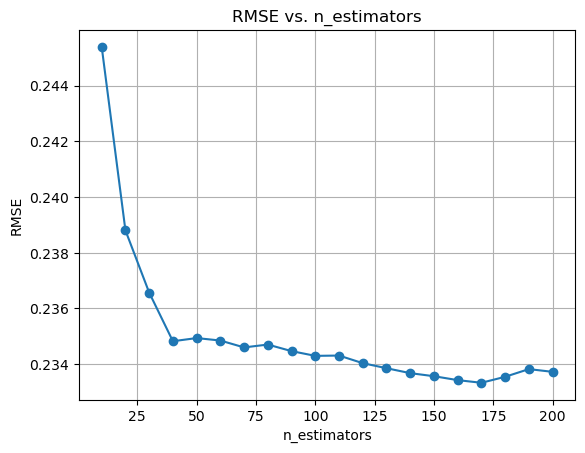

In [41]:
import matplotlib.pyplot as plt

# Plot RMSE values
plt.plot(n_estimators_values, rmse_values, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs. n_estimators')
plt.grid(True)

# Show the plot
plt.show()

## Question 4

Let's select the best max_depth:

    Try different values of max_depth: [10, 15, 20, 25]
    For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
    Fix the random seed: random_state=1

In [30]:
# Define the values for max_depth and n_estimators to try
max_depth_values = [10, 15, 20, 25]
n_estimators_values = list(range(10, 201, 10))

# Initialize variables to keep track of the best RMSE, max_depth, and n_estimators
best_rmse = float('inf')
best_max_depth = None
best_n_estimators = None

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Create and train the random forest model
        rf_model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=1, n_jobs=-1)
        rf_model.fit(X_train, y_train)

        # Make predictions on the validation data
        y_val_pred = rf_model.predict(X_val)

        # Calculate RMSE
        rmse = mean_squared_error(y_val, y_val_pred, squared=False)

        # Check if this model's RMSE is better than the best RMSE so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_max_depth = max_depth
            best_n_estimators = n_estimators

# Print the best max_depth and n_estimators
print(f"Best max_depth = {best_max_depth}, Best n_estimators = {best_n_estimators}")

Best max_depth = 20, Best n_estimators = 160


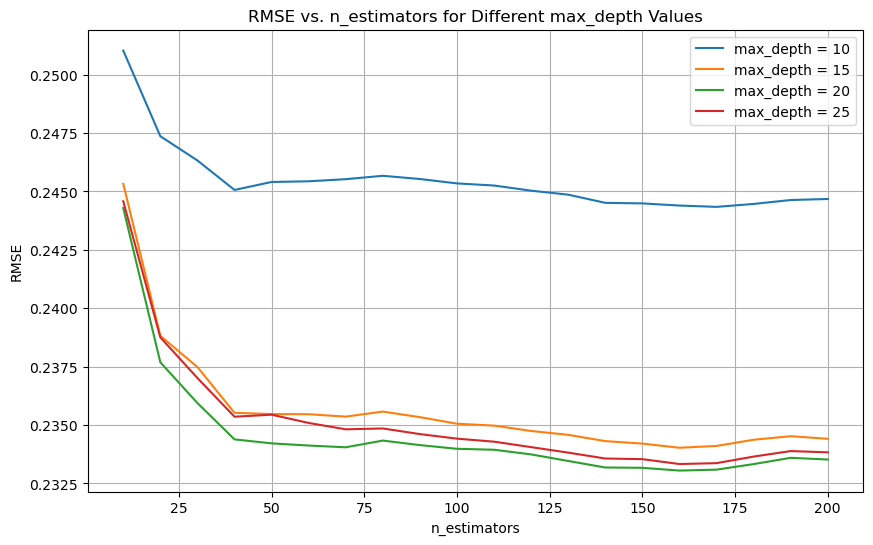

In [43]:
# Create a plot
plt.figure(figsize=(10, 6))
for i, max_depth in enumerate(max_depth_values):
    plt.plot(n_estimators_values, rmse_values[i], label=f"max_depth = {max_depth}")

plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs. n_estimators for Different max_depth Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Question 5 
extract feature importance information from tree-based models
For this homework question, we'll find the most important feature:

    Train the model with these parametes:
        n_estimators=10,
        max_depth=20,
        random_state=1,
        n_jobs=-1 (optional)
    Get the feature importance information from this model

What's the most important feature (among these 4)?

    total_rooms
    median_income
    total_bedrooms
    longitude

In [44]:
# Create and train the random forest model
rf_model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [45]:
# Get the feature importance information
feature_importance = rf_model.feature_importances_

In [49]:
# Create a dictionary mapping feature names to feature importance values
feature_importance_dict = dict(zip(dv.get_feature_names_out(), feature_importance))
feature_importance_dict

{'households': 0.014555433639129103,
 'housing_median_age': 0.030323451392227505,
 'latitude': 0.10151452760305246,
 'longitude': 0.08709333928795938,
 'median_income': 0.33574968032761554,
 'ocean_proximity=<1H OCEAN': 0.035297113178256095,
 'ocean_proximity=INLAND': 0.33098243681580797,
 'population': 0.028345150071234507,
 'total_bedrooms': 0.015154470388830506,
 'total_rooms': 0.02098439729588686}

In [56]:
# Find the most important feature
most_important_feature = max(feature_importance_dict, key=feature_importance_dict.get)

In [57]:
# Print the most important feature
print("The most important feature is:", most_important_feature)

The most important feature is: median_income


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:

In [60]:
import xgboost as xgb

# Create DMatrix for train data
dtrain = xgb.DMatrix(X_train, label=y_train)

# Create DMatrix for validation data
dval = xgb.DMatrix(X_val, label=y_val)

In [61]:
evals = [(dtrain, 'train'), (dval, 'validation')]


In [66]:
import xgboost as xgb

# Define XGBoost parameters for the first model with eta=0.3
xgb_params_0_3 = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

# Train the first model
model_0_3 = xgb.train(xgb_params_0_3, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=True)

# Define XGBoost parameters for the second model with eta=0.1
xgb_params_0_1 = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

# Train the second model
model_0_1 = xgb.train(xgb_params_0_1, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=True)

# Get the RMSE for each model
rmse_0_3 = model_0_3.best_score
rmse_0_1 = model_0_1.best_score

# Compare RMSE values
if rmse_0_3 < rmse_0_1:
    print("0.3 leads to best RMSE score on validation.")
elif rmse_0_1 < rmse_0_3:
    print("0.1 leads to best RMSE score on validation.")
else:
    print("0.3 and 0.1 give equal values")

[0]	train-rmse:0.44351	validation-rmse:0.44250
[1]	train-rmse:0.36600	validation-rmse:0.36917
[2]	train-rmse:0.31556	validation-rmse:0.32383
[3]	train-rmse:0.28541	validation-rmse:0.29965
[4]	train-rmse:0.26573	validation-rmse:0.28418
[5]	train-rmse:0.25338	validation-rmse:0.27463
[6]	train-rmse:0.24157	validation-rmse:0.26770
[7]	train-rmse:0.23486	validation-rmse:0.26423
[8]	train-rmse:0.22668	validation-rmse:0.25820
[9]	train-rmse:0.21996	validation-rmse:0.25444
[10]	train-rmse:0.21445	validation-rmse:0.25179
[11]	train-rmse:0.21155	validation-rmse:0.25054
[12]	train-rmse:0.20729	validation-rmse:0.24791
[13]	train-rmse:0.20318	validation-rmse:0.24628
[14]	train-rmse:0.20135	validation-rmse:0.24630
[15]	train-rmse:0.19858	validation-rmse:0.24523
[16]	train-rmse:0.19580	validation-rmse:0.24445
[17]	train-rmse:0.19333	validation-rmse:0.24395
[18]	train-rmse:0.19107	validation-rmse:0.24284
[19]	train-rmse:0.18735	validation-rmse:0.24127
[20]	train-rmse:0.18524	validation-rmse:0.23978
[2